In [1]:
import abc
import yaml
from dataclasses import dataclass, field
from typing import List

import numpy as np

# Numpy - вектора и матрицы

In [2]:
vector = np.array([1, 2, 3, 4,])
vector, vector.shape

(array([1, 2, 3, 4]), (4,))

In [3]:
print("Elementwise product")
vector * vector

Elementwise product


array([ 1,  4,  9, 16])

In [4]:
print("Reshape")
vector.reshape(-1, 1), vector.shape, vector.reshape(-1, 1).shape, vector.reshape(2, 2).shape

Reshape


(array([[1],
        [2],
        [3],
        [4]]),
 (4,),
 (4, 1),
 (2, 2))

In [5]:
print("Scalar product")
vector.dot(vector)

Scalar product


30

In [6]:
print("Scalar product")
matrix = vector.reshape(-1, 1).dot(vector.reshape(1, -1))
matrix

Scalar product


array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

In [7]:
print("Determinant")
np.linalg.det(matrix)

Determinant


0.0

In [8]:
print("Broadcast")
vector * 3, vector ** 2, np.log(vector)

Broadcast


(array([ 3,  6,  9, 12]),
 array([ 1,  4,  9, 16]),
 array([0.        , 0.69314718, 1.09861229, 1.38629436]))

In [9]:
print("Slices")
# [[start:stop:step], ...]
vector, vector[1:], vector[1:3], vector[1:3:1], vector[-1], vector[:-2]

Slices


(array([1, 2, 3, 4]),
 array([2, 3, 4]),
 array([2, 3]),
 array([2, 3]),
 4,
 array([1, 2]))

# [Classes](https://docs.python.org/3/tutorial/classes.html)

## Class object

In [10]:
class ClassWithYourName:
    
    # Обязательный метод def __init__(self): Совершает инициализацию после создания объекта
    def __init__(self, var_1, var_2, var3 = None) -> None:
        # Все необходимые для класса атрибуты создаются в нем при помощи ссылки на себя самого (self)
        self.some_var_1 = var_1
        self.some_var_2 = var_2
        self.some_var_3 = var_3
        
        # Любые вычисления можно тоже делать тут, они выполнятся вместе с инициализацией
        if var_3:
            self.some_var_3 = "Hehe"
        
        # Можно и дергать методы тут, тоже через self
        self.some_var_4 = self.compute_something(self.some_var_2)
        
    
    # Методы которые используют атрибуты класса или другие методы класса
    # должны иметь первым аргументом слово self
    def compute_something(self, p_value):
        return self.some_var_1 * p_value
    

In [11]:
# Пример
class Planet:
    def __init__(self, name, distance=0, population = 0):
        self.name = name
        self.population = population
        self.distance = distance
    
    def __repr__(self):
        return f"Planet {self.name}"
        
    def kill_all_human(self):
        self.population = 0

    def au_to_km(self, x):
        return x * 1.496e+8
    
    @property
    def distance_km(self):
        return self.au_to_km(self.distance)

In [12]:
earth = Planet(name='Earth', population=7.888 * 10**9)

In [13]:
earth

Planet Earth

In [14]:
earth.name, earth.population

('Earth', 7888000000.0)

In [15]:
earth.kill_all_human()

In [16]:
earth.population

0

In [17]:
solar_system_planets_info = [
    {"name": "Earth", "population": 7.888 * 10**9, "distance": 0.983},
    {"name": "Mars", "population": 0, "distance": 1.382},
    {"name": "Jupiter", "population": 0, "distance": 4.951},
    {"name": "Saturn", "population": 0, "distance": 9.075},
    {"name": "Mercury", "population": 0, "distance": 0.307},
    {"name": "Venus", "population": 0, "distance": 0.718},
    {"name": "Uranus", "population": 0, "distance": 18.27},
    {"name": "Neptune", "population": 0, "distance": 29.89},
]

planets = [Planet(**kwargs) for kwargs in solar_system_planets_info]

In [18]:
planets

[Planet Earth,
 Planet Mars,
 Planet Jupiter,
 Planet Saturn,
 Planet Mercury,
 Planet Venus,
 Planet Uranus,
 Planet Neptune]

In [19]:
sorted(planets, key=lambda x: x.distance)

[Planet Mercury,
 Planet Venus,
 Planet Earth,
 Planet Mars,
 Planet Jupiter,
 Planet Saturn,
 Planet Uranus,
 Planet Neptune]

In [20]:
inhabited_planet = list(filter(lambda x: x.population != 0, planets))
inhabited_planet

[Planet Earth]

## Inheritance

In [21]:
class Human:
    def __init__(self, name: str, age: int, sex: str) -> None:
        self.name = name
        self.age = age
        self.sex = sex
    
    def who_am_i(self,) -> str:
        return f"I'm {self.name}, {self.age} years old."
    
    def some_example_function(self):
        return self.age

In [22]:
class Student(Human):
    
    def __init__(self, name: str, age: int, sex: str, university: str) -> None:
        self.name = name
        self.age = age
        self.sex = sex
        self.university = university
        self._sum_grade = 0
        self._grade_cnt = 0
        
    def avg_grade(self) -> float:
        if self._grade_cnt == 0:
            return 0
        return self._sum_grade / self._grade_cnt
    
    def update_grades(self, grade: int) -> None:
        self._sum_grade += grade
        self._grade_cnt += 1
    
    def description(self) -> str:
        whoami = self.who_am_i()
        univ_str = f"I'm study in {self.university}. My average grade is {self.avg_grade()}."
        return " ".join([whoami, univ_str])

In [23]:
student = Student(name="Neznayka", age=20, sex="M", university="MPEI")

In [24]:
student.who_am_i()

"I'm Neznayka, 20 years old."

In [25]:
student.description()

"I'm Neznayka, 20 years old. I'm study in MPEI. My average grade is 0."

In [26]:
student.update_grades(5)

In [27]:
student.description()

"I'm Neznayka, 20 years old. I'm study in MPEI. My average grade is 5.0."

In [28]:
student.some_example_function()

20

In [29]:
class Student_v2(Student):
    
    def __init__(self, name: str, age: int, sex: str, university: str) -> None:
        self.name = name
        self.age = age
        self.sex = sex
        self.university = university
        self._sum_grade = 0
        self._grade_cnt = 0
        
    def some_example_function(self, planet: Planet):
        return f"I will eat the {planet.name}"

In [30]:
another_student = Student_v2(name="Neznayka", age=20, sex="M", university="MPEI")

In [31]:
another_student.some_example_function(planet=earth)

'I will eat the Earth'

In [32]:
another_student.description()

"I'm Neznayka, 20 years old. I'm study in MPEI. My average grade is 0."

# Magic methods
## [Doc](https://docs.python.org/3/reference/datamodel.html#special-method-names)
## [Tutorial](https://rszalski.github.io/magicmethods/)

In [33]:
class SomeCustomList:
    """
    Some class documentation
    """
    
    protected_fields = ["v"]
    
    def __init__(self, values):
        self.v = list(values)
        self.__index = -1
        
    @property
    def max_distance(self):
        return max(self.v) - min(self.v)
    
    def __len__(self):
        return len(self.v)
    
    def __next__(self):
        self.__index += 1 
        if self.__index == len(self):
            raise StopIteration
        return self.v[self.__index]
    
    def __iter__(self):
        return iter(self.v)
    
    def __setattr__(self, name, value):
        if name in self.protected_fields and self.__dict__.get(name, None) is not None:
            raise ValueError("field couldn't be modilfyed after setting")
        self.__dict__[name] = value
        
    def append(self, value):
        self.v.append(value)
    
    def head(self, n=1):
        return self.v[:n]

    def tail(self, n=1):
        return self.v[-n:]
    
    def __add__(self, other):
        if isinstance(other, list):
            return self.v + values
        raise ValueError("This feature works only with list")
    
    def __rshift__(self, values):
        if isinstance(values, list):
            return self.v + ["something in the middle"] + values
        if isinstance(values, SomeCustomList):
            return self.v + ["something in the middle"] + values.v[::-1]
        ValueError("This feature works only with list and SomeCustomList")
        
    def __repr__(self) -> str:
        return "CustomList[" + ", ".join(map(str, a.v)) + "]"

In [34]:
a = SomeCustomList([3, 2, 1])

In [35]:
for i in a:
    print(i)

3
2
1


In [36]:
a.v = [5, 6,7 ]

ValueError: field couldn't be modilfyed after setting

In [37]:
a.tail(2)

[2, 1]

In [38]:
b = ["a", "b", "c"]

In [39]:
a >> b

[3, 2, 1, 'something in the middle', 'a', 'b', 'c']

In [40]:
a >> a

[3, 2, 1, 'something in the middle', 1, 2, 3]

In [41]:
a

CustomList[3, 2, 1]

In [42]:
a.__dict__

{'v': [3, 2, 1], '_SomeCustomList__index': -1}

In [43]:
a.__doc__

'\n    Some class documentation\n    '

In [44]:
a.__module__

'__main__'

In [45]:
np.array.__module__

'numpy'

## Dataclass

In [46]:
@dataclass
class SomeStorage:
    point_1: float = field(default=0.0)
    point_2: float = field(default=2.0)
    point_3: float = field(default=1.0)
    
    planets: List[Planet] = field(default_factory=list)

In [47]:
storage = SomeStorage()

In [48]:
storage

SomeStorage(point_1=0.0, point_2=2.0, point_3=1.0, planets=[])

In [49]:
storage_v2 = SomeStorage(point_1=100, point_3=992, )

In [50]:
storage_v2

SomeStorage(point_1=100, point_2=2.0, point_3=992, planets=[])

In [51]:
storage_v2.point_2 = 1e6

In [52]:
storage_v2

SomeStorage(point_1=100, point_2=1000000.0, point_3=992, planets=[])

In [53]:
storage_v2.point_1 = False

In [54]:
storage_v2

SomeStorage(point_1=False, point_2=1000000.0, point_3=992, planets=[])

## Abstract class

In [55]:
class Human(abc.ABC):

    @abc.abstractmethod
    def do_job(self, *args, **kwargs):
        raise NotImplementedError()
    
    @abc.abstractmethod
    def greetings(self, name: str):
        raise NotImplementedError()

In [56]:
a = Human()

TypeError: Can't instantiate abstract class Human with abstract methods do_job, greetings

In [57]:
class Scientist(Human):
    def __init__(self, name: str):
        self.name = name

In [58]:
doc = Scientist("Valera")

TypeError: Can't instantiate abstract class Scientist with abstract methods do_job, greetings

In [59]:
class Scientist_v2(Human):
    def __init__(self, name: str):
        self.name = name

    def do_job(self, destinaton: str) -> str:
        return f"I made a spaceship to the {destinaton}"

    def greetings(self) -> str:
        return f"My name is {self.name}"

In [60]:
doc = Scientist_v2("Valera")

In [61]:
doc.do_job("Moon")

'I made a spaceship to the Moon'

In [62]:
doc.greetings()

'My name is Valera'

# YAML

In [4]:
with open("example.yaml", "r") as file:
    cfg = yaml.load(file, yaml.SafeLoader)

In [7]:
cfg

{'Gases': {'Air': {'Cp': 287.05}, 'Steam': {'Cp': 461.52}}}

In [9]:
cfg["Gases"].get("Air", {}).get("Cp", None)

287.05

# Паттерн проектирования: Фасад


Фасад — это структурный паттерн проектирования, который предоставляет простой интерфейс к сложной системе классов, библиотеке или фреймворку.

Вашему коду приходится работать с большим количеством объектов некой сложной библиотеки или фреймворка. Вы должны самостоятельно инициализировать эти объекты, следить за правильным порядком зависимостей и так далее.
В результате логика ваших классов тесно переплетается с деталями реализации сторонних классов. Такой код довольно сложно понимать и поддерживать.

Фасад — это простой интерфейс для работы со сложной подсистемой, содержащей множество классов. Фасад может иметь урезанный интерфейс, не имеющий 100% функциональности, которой можно достичь, используя сложную подсистему напрямую. Но он предоставляет именно те фичи, которые нужны клиенту, и скрывает все остальные.

Фасад полезен, если вы используете какую-то сложную библиотеку со множеством подвижных частей, но вам нужна только часть её возможностей.

## Как создать:

1. Создаем интерфейс фасада. В нем перечисляем нужные нам методы системы, которые предоставляет фасад. 
2. Создаем класс фасада, который реализует этот интерфейс.
3. В методах этого класса реализуем обращения к сложной системе, которая скрывается за фасадом. 

# Паттерн проектирования: Адаптер

Адаптер — структурный шаблон проектирования, предназначенный для организации использования функций объекта, недоступного для модификации, через специально созданный интерфейс. Адаптер позволяет объектам с несовместимыми интерфейсами работать вместе.

Часто используется, если мы работаем со сторонней библиотекой или компонентом, доступ к изменениями методов которого у нас отсутствует. Или когда есть несколько сторонних систем, доступ к которым должен осуществляться единообразно через одинаковый интерфейс. 


## Как создать:

1. Создаем класс Адаптера. 
2. В этом классе реализуем метод, который принимает на входе объект в незнакомом формате, а возвращает объект нужного нам формата.
3. В этом методе реализуем логику преобразования объекта одного формата в другой.

# Идеальный газ

$$C_p(T) = const$$
Уравнение состояния идеального газа:
$$PV = RT, h=Cp\dot \Delta T$$
Уравнения процессов:
$$PV = const, \space T = const$$
$$\frac{P}{T} = const, \space V = const$$
$$\frac{V}{T} = const, \space P = const$$
$$PV^k = const, S = const$$
где:
$$k = \frac{Cp}{Cv}, \space Cp - Cv = R$$


# Полуидеальный газ
$$C_p(T) \ne const$$
Уравнение состояния идеального газа:
* Можно принять Менделеева - Клайперона как базовое
* Можно уточнить соответственно моделируемому газу. Например Ван-Дер-Вальса или иное.

Уравнения процессов выводятся на основании принятых уравнений состояния идеаьного газа, а так же учитывая изменения Cp(T)

Обычно уравнения состояния и Cp(T) даются в статьях по исследованию конкретных газов. Это более предпочтительный вариант.
Другой подход к моделированию полуидеальных газов заключается в введении уравнений описывающих Cp(T) коэффициентами. Например `Glenn Coefficients for Calculating Thermodynamic Properties of Individual Species`

# Продукты сгорания

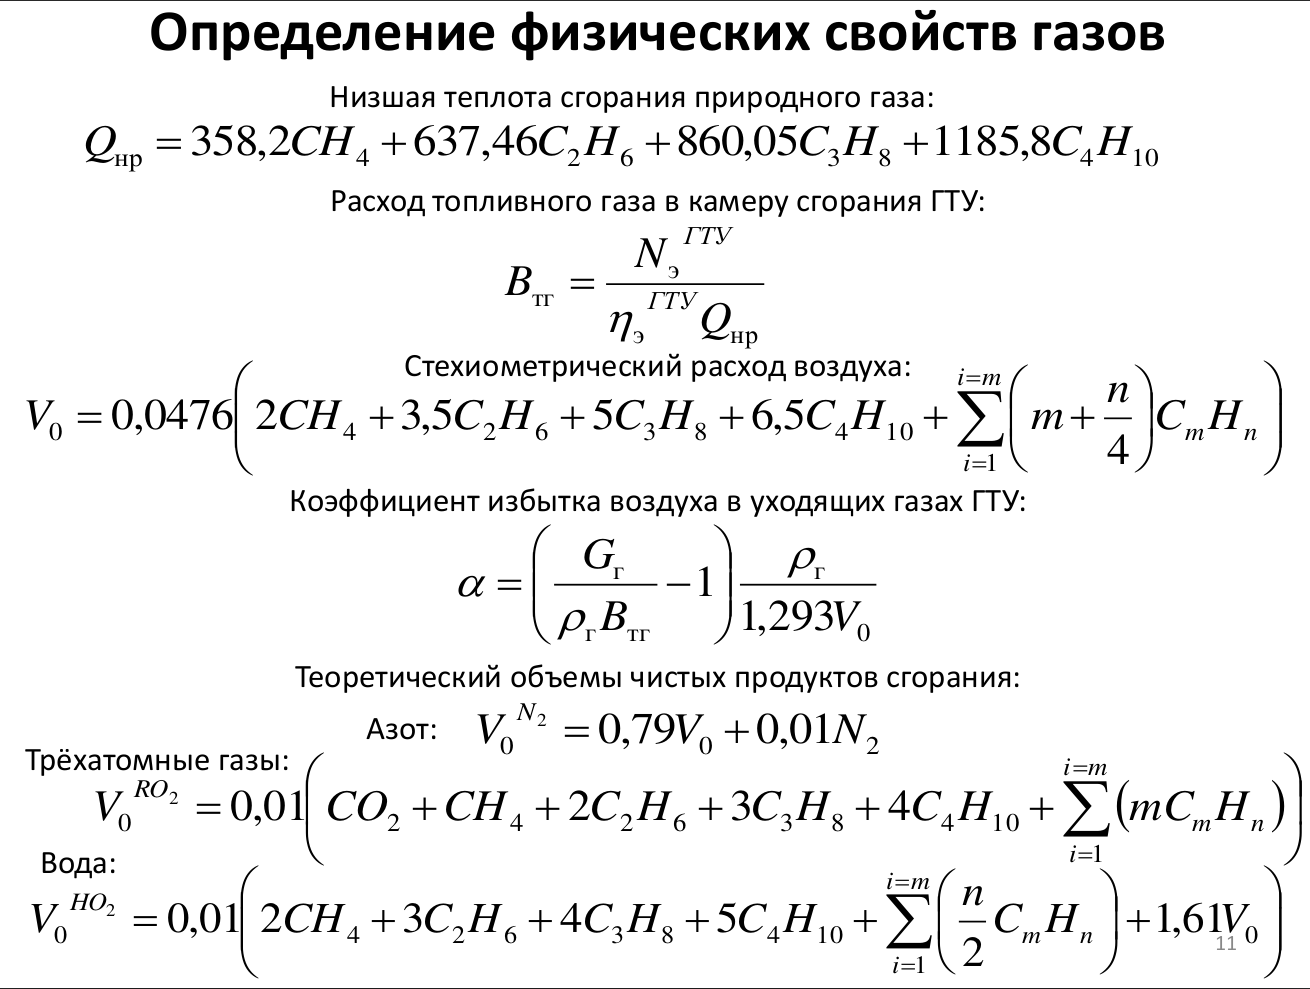

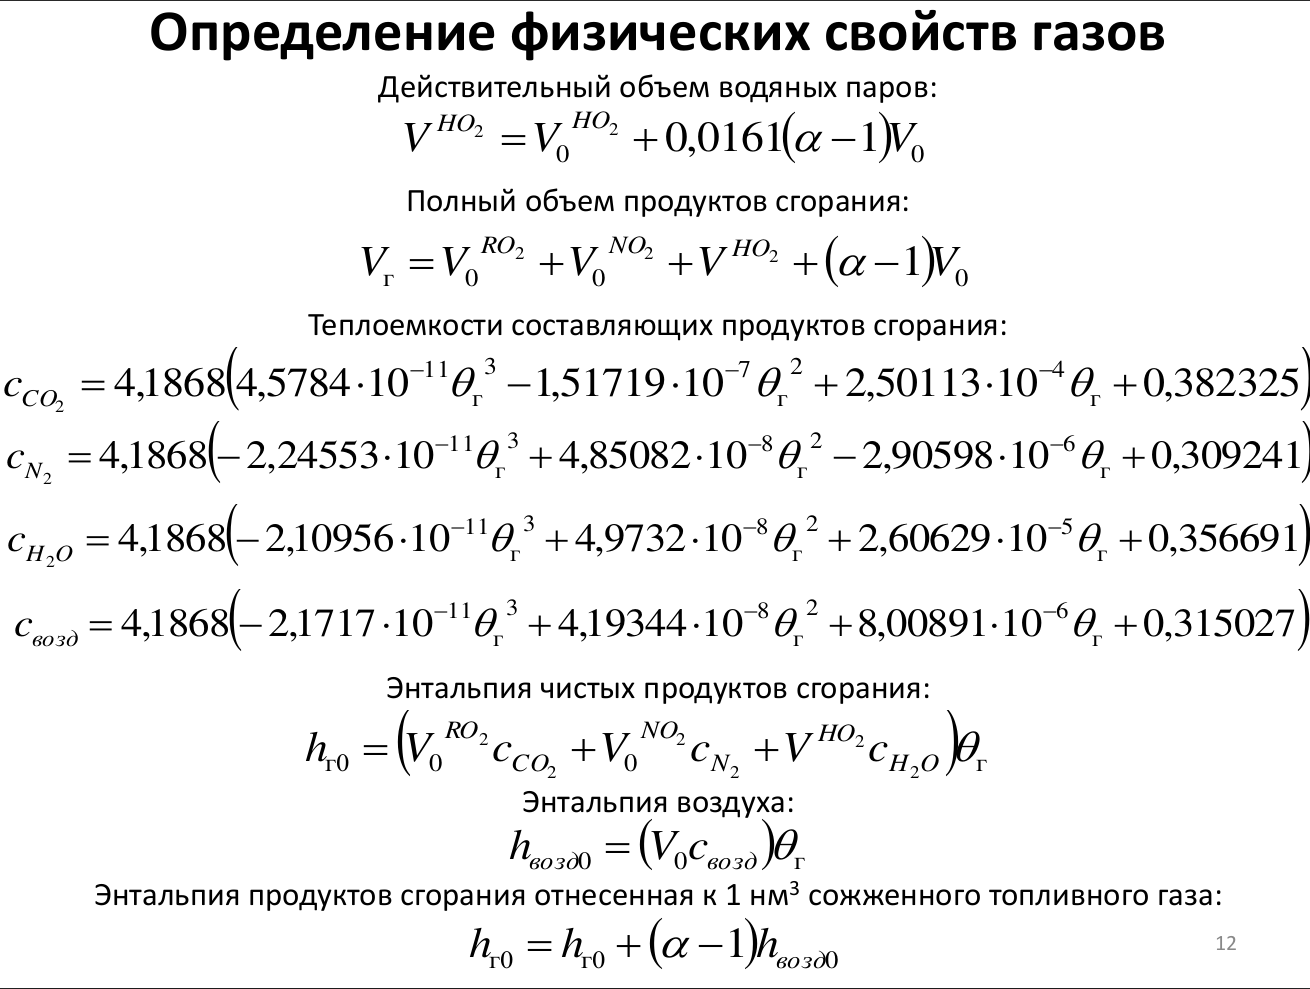

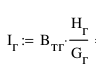

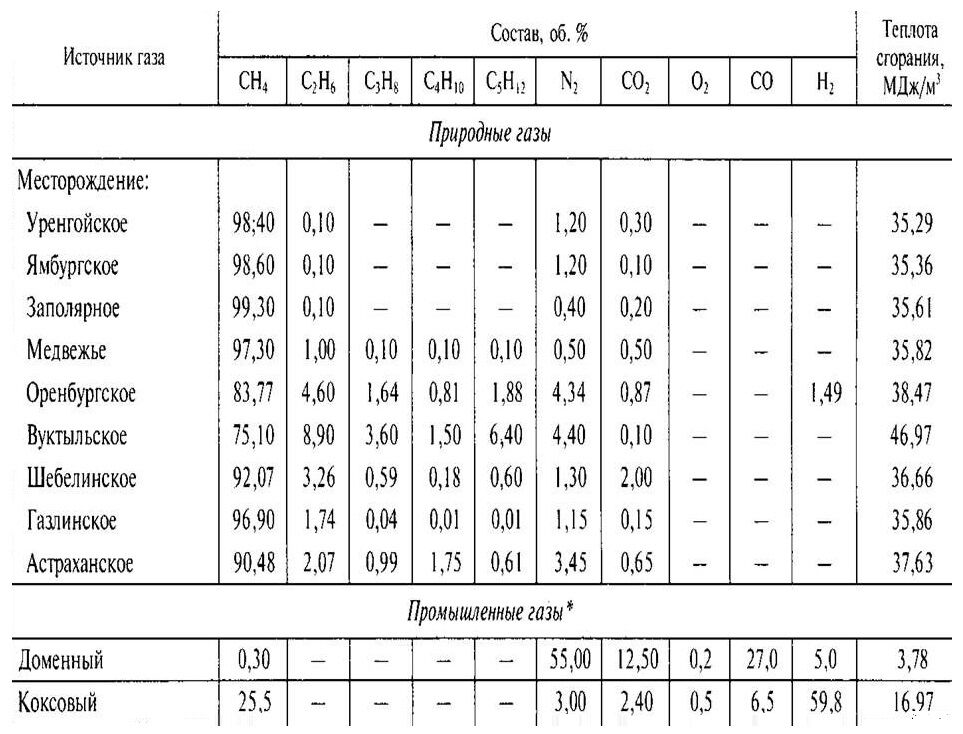

Полезная информация:

http://twt.mpei.ac.ru/tthb/2/oivt/hb_v201/Glava2/2.pdf

https://dspace.tltsu.ru/bitstream/123456789/311/1/%D0%9A%D0%BE%D0%BB%D0%BE%D0%BC%D0%B8%D0%B5%D1%86%201-97-10.pdf